In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
airlines = pd.read_csv("dataset/airlines.csv")
airports = pd.read_csv("dataset/airports.csv")
flights = pd.read_csv("dataset/flights.csv",dtype={'TAIL_NUMBER' : str, 'ORIGIN_AIRPORT' : str, \
'DESTINATION_AIRPORT' : str})

## Data Exploration

In [3]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
flights.shape

(5819079, 31)

In [5]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [6]:
airlines.shape

(14, 2)

In [7]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [8]:
airports.shape

(322, 7)

In [9]:
list(flights.columns)

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

## Data Preprocessing

In [10]:
# removing unnecessary columns
dropColumns = ['FLIGHT_NUMBER', 'TAIL_NUMBER', 'TAXI_OUT', 'WHEELS_OFF', 'AIR_TIME', 'WHEELS_ON',\
              'TAXI_IN', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', \
               'WEATHER_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON','ELAPSED_TIME',\
               'ARRIVAL_TIME','ARRIVAL_DELAY']
flights = flights.drop(dropColumns, axis = 1)
flights.shape

(5819079, 13)

In [11]:
# checking for null values
flights.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME         86153
DEPARTURE_DELAY        86153
SCHEDULED_TIME             6
DISTANCE                   0
SCHEDULED_ARRIVAL          0
dtype: int64

In [12]:
# removing rows that contain null values for 'departure time', departure delay' and 'scheduled time'
flights = flights.dropna(subset=['DEPARTURE_TIME', 'DEPARTURE_DELAY','SCHEDULED_TIME'])

In [13]:
flights.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
SCHEDULED_TIME         0
DISTANCE               0
SCHEDULED_ARRIVAL      0
dtype: int64

In [14]:
flights[['SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY']].head()

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY
0,5,2354.0,-11.0
1,10,2.0,-8.0
2,20,18.0,-2.0
3,20,15.0,-5.0
4,25,24.0,-1.0


In [15]:
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
SCHEDULED_TIME         float64
DISTANCE                 int64
SCHEDULED_ARRIVAL        int64
dtype: object

In [16]:
# converting the datatype of departure time to int
flights['DEPARTURE_TIME'] = flights['DEPARTURE_TIME'].astype(int)

In [17]:
flights['DEPARTURE_TIME'].head()

0    2354
1       2
2      18
3      15
4      24
Name: DEPARTURE_TIME, dtype: int64

In [18]:
def changeTimeFormat(value):
    """
    This function changes the format of columns that represent time
    After this function is applied on respective columns, the time is 
    represented as hour blocks. Ex. 12:20 is represented as '1' indicating
    it is the first hour of the day. Similarly, 18:30 is represented as '19'
    indicating the 19th hour of the day.
    """
    timeAsString = str(value)
    if (len(timeAsString) == 1) or (len(timeAsString) == 2):
        return 1
    if len(timeAsString) == 3:
        return int(timeAsString[0])+1
    if len(timeAsString) == 4:
        return int(timeAsString[0:2])+1

In [19]:
# changing time format to hour blocks
flights['SCHEDULED_DEPARTURE'] = flights['SCHEDULED_DEPARTURE'].apply(changeTimeFormat)
flights['DEPARTURE_TIME'] = flights['DEPARTURE_TIME'].apply(changeTimeFormat)
flights['SCHEDULED_ARRIVAL'] = flights['SCHEDULED_ARRIVAL'].apply(changeTimeFormat)

In [20]:
flights[['SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_ARRIVAL']].head()

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_ARRIVAL
0,1,24,5
1,1,1,8
2,1,1,9
3,1,1,9
4,1,1,4


In [21]:
"""
Adding the class labels to data. To be realistic, only the flights
that are more than 5 minutes late are considered to be delayed. The
'DEPARTURE_DELAY' column that represents the flight delay in minutes
is used to assign class labels.
"""
flights['STATUS'] = np.where(flights['DEPARTURE_DELAY'] > 5, 'delayed', 'on time')

In [22]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,STATUS
0,2015,1,1,4,AS,ANC,SEA,1,24,-11.0,205.0,1448,5,on time
1,2015,1,1,4,AA,LAX,PBI,1,1,-8.0,280.0,2330,8,on time
2,2015,1,1,4,US,SFO,CLT,1,1,-2.0,286.0,2296,9,on time
3,2015,1,1,4,AA,LAX,MIA,1,1,-5.0,285.0,2342,9,on time
4,2015,1,1,4,AS,SEA,ANC,1,1,-1.0,235.0,1448,4,on time


## Exploratory Visualization

In [23]:
# counting the number of flights delayed and the number of flights on time
countByStatus = pd.DataFrame({'COUNT' : flights.groupby('STATUS').size()}).reset_index()
countByStatus

,STATUS,COUNT
0,delayed,1561855
1,on time,4171065


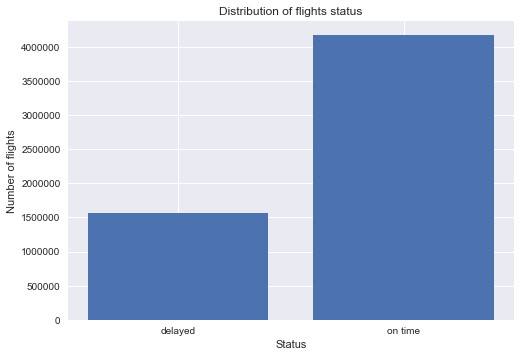

In [24]:
# distribution of class labels
plt.bar(range(len(countByStatus['STATUS'])),countByStatus['COUNT'], align = 'center')
plt.xticks(range(len(countByStatus['STATUS'])), countByStatus['STATUS'])
#plt.yticks(range(0,30,5))
plt.xlabel('Status')
plt.ylabel('Number of flights')
plt.title('Distribution of flights status')
plt.show()

In [25]:
#Grouping the data based on Airline to determine the number of flights by each airline
countByAirline = pd.DataFrame({'COUNT' : flights.groupby('AIRLINE').size()}).reset_index()
countByAirline['PERCENTAGE'] = np.nan
total = countByAirline['COUNT'].sum()
countByAirline['PERCENTAGE'] = (countByAirline['COUNT']/total) * 100

In [26]:
countByAirline

,AIRLINE,COUNT,PERCENTAGE
0,AA,715598,12.482260
1,AS,171910,2.998646
2,B6,262843,4.584801
3,DL,872177,15.213486
4,EV,557294,9.720945
5,F9,90290,1.574939
6,HA,76119,1.327753
7,MQ,280282,4.888992
8,NK,115448,2.013773
9,OO,579086,10.101065


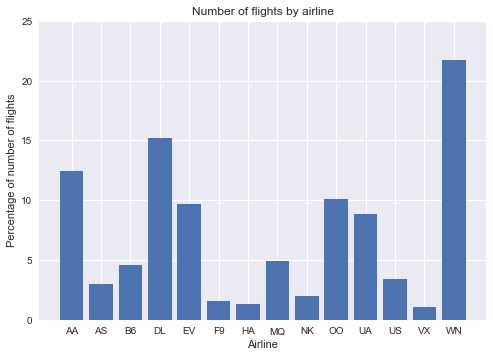

In [27]:
# distribution of number of flights by airline
plt.bar(range(len(countByAirline['AIRLINE'])),countByAirline['PERCENTAGE'], align = 'center')
plt.xticks(range(len(countByAirline['AIRLINE'])), countByAirline['AIRLINE'])
plt.yticks(range(0,30,5))
plt.xlabel('Airline')
plt.ylabel('Percentage of number of flights')
plt.title('Number of flights by airline')
plt.show()

In [28]:
# determining the number of flights delayed and number of ontime flights by each airline
countByAirlineStatus = pd.DataFrame({'COUNT' : flights.groupby(['AIRLINE','STATUS']).size()}).reset_index()
countByAirlineStatus

,AIRLINE,STATUS,COUNT
0,AA,delayed,178708
1,AA,on time,536890
2,AS,delayed,29591
3,AS,on time,142319
4,B6,delayed,80703
5,B6,on time,182140
6,DL,delayed,195362
7,DL,on time,676815
8,EV,delayed,133316
9,EV,on time,423978


In [29]:
delayedByAirline = countByAirlineStatus[countByAirlineStatus['STATUS'] == "delayed"]
#ontimeByAirline = countByAirlineStatus[countByAirlineStatus['STATUS'] == "on time"]

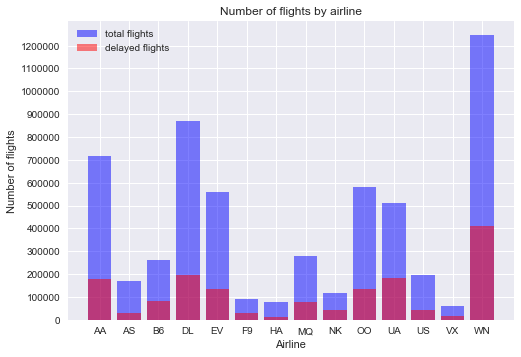

In [30]:
# distribution of delayed and ontime flights by airline
plt.bar(range(len(countByAirline['AIRLINE'])),countByAirline['COUNT'], align = 'center', \
        color = 'b', alpha = 0.5, label = "total flights")
plt.bar(range(len(delayedByAirline['AIRLINE'])),delayedByAirline['COUNT'], align = 'center', \
        color = 'r', alpha = 0.5, label = "delayed flights")
plt.xticks(range(len(countByAirline['AIRLINE'])), countByAirline['AIRLINE'])
plt.yticks(range(0,1300000,100000))
plt.xlabel('Airline')
plt.ylabel('Number of flights')
plt.title('Number of flights by airline')
plt.legend()
plt.show()

In [31]:
# determing the number of flights by the day of the week
# 1 represents Monday, while 7 represents Sunday
countFlightsDayWeek = pd.DataFrame({'COUNT' : flights.groupby('DAY_OF_WEEK').size()}).reset_index()
countFlightsDayWeek

,DAY_OF_WEEK,COUNT
0,1,845287
1,2,829990
2,3,845583
3,4,860780
4,5,853884
5,6,692252
6,7,805144


In [32]:
# determining the total number of delayed and ontime flights for each day of the week
countFlightsDayStatus = pd.DataFrame({'COUNT' : flights.groupby(['DAY_OF_WEEK', 'STATUS']).size()}).reset_index()
countFlightsDayStatus

,DAY_OF_WEEK,STATUS,COUNT
0,1,delayed,239472
1,1,on time,605815
2,2,delayed,218899
3,2,on time,611091
4,3,delayed,222550
5,3,on time,623033
6,4,delayed,246658
7,4,on time,614122
8,5,delayed,241371
9,5,on time,612513


In [33]:
delayedByDayWeek = countFlightsDayStatus[countFlightsDayStatus['STATUS'] == "delayed"]
delayedByDayWeek

,DAY_OF_WEEK,STATUS,COUNT
0,1,delayed,239472
2,2,delayed,218899
4,3,delayed,222550
6,4,delayed,246658
8,5,delayed,241371
10,6,delayed,171863
12,7,delayed,221042


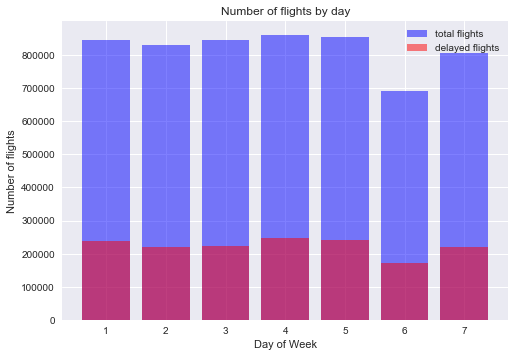

In [34]:
# distribution of delayed and ontime flights by day of the week
plt.bar(range(len(countFlightsDayWeek['DAY_OF_WEEK'])),countFlightsDayWeek['COUNT'], align = 'center', \
        color = 'b', alpha = 0.5, label = "total flights")
plt.bar(range(len(delayedByDayWeek['DAY_OF_WEEK'])),delayedByDayWeek['COUNT'], align = 'center', \
        color = 'r', alpha = 0.5, label = "delayed flights")
plt.xticks(range(len(countFlightsDayWeek['DAY_OF_WEEK'])), countFlightsDayWeek['DAY_OF_WEEK'])
plt.yticks(range(0,900000,100000))
plt.xlabel('Day of Week')
plt.ylabel('Number of flights')
plt.title('Number of flights by day')
plt.legend()
plt.show()

In [35]:
# getting a subset of the data for modelling
# considering the data for the first two months (January and February)
modellingData = flights[flights['MONTH'] <= 2]
modellingData.shape

(867441, 14)

In [36]:
# distribution of clas labels in the data subset
modellingDataDistribution = pd.DataFrame({'COUNT' : modellingData.groupby('STATUS').size()}).reset_index()
modellingDataDistribution

,STATUS,COUNT
0,delayed,263836
1,on time,603605


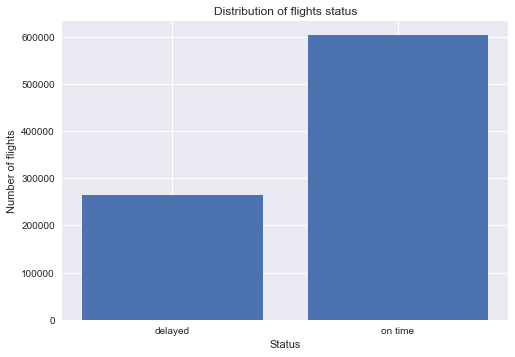

In [37]:
# distribution of class labels
plt.bar(range(len(modellingDataDistribution['STATUS'])),modellingDataDistribution['COUNT'], align = 'center')
plt.xticks(range(len(modellingDataDistribution['STATUS'])), modellingDataDistribution['STATUS'])
#plt.yticks(range(0,30,5))
plt.xlabel('Status')
plt.ylabel('Number of flights')
plt.title('Distribution of flights status')
plt.show()

## Data preprocessing for implementation

In [38]:
# list of columns
modellingData.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL',
       'STATUS'],
      dtype='object')

In [39]:
# removing unnecessary columns
modellingData = modellingData.drop(['YEAR','DEPARTURE_TIME','DEPARTURE_DELAY'],axis = 1)

In [40]:
modellingData.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,STATUS
0,1,1,4,AS,ANC,SEA,1,205.0,1448,5,on time
1,1,1,4,AA,LAX,PBI,1,280.0,2330,8,on time
2,1,1,4,US,SFO,CLT,1,286.0,2296,9,on time
3,1,1,4,AA,LAX,MIA,1,285.0,2342,9,on time
4,1,1,4,AS,SEA,ANC,1,235.0,1448,4,on time


In [41]:
# replacing the values of the columns DAY_OF_WEEK and STATUS
replaceWeekDay = {1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',7:'Sun'}
replaceStatus = {'on time':1, 'delayed':0}
modellingData = modellingData.replace({"DAY_OF_WEEK":replaceWeekDay,"STATUS":replaceStatus})

In [42]:
modellingData.tail(10)

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,STATUS
899149,2,28,Sat,B6,PHX,JFK,24,267.0,2153,7,0
899150,2,28,Sat,B6,DEN,JFK,24,211.0,1626,6,1
899151,2,28,Sat,B6,JFK,BQN,24,221.0,1576,5,1
899152,2,28,Sat,B6,JFK,PSE,24,227.0,1617,5,0
899153,2,28,Sat,B6,SLC,MCO,24,254.0,1931,7,0
899154,2,28,Sat,B6,JFK,SJU,24,221.0,1598,5,0
899155,2,28,Sat,US,SLC,PHL,24,238.0,1927,6,1
899156,2,28,Sat,US,PHX,MSP,24,180.0,1276,4,1
899157,2,28,Sat,F9,DEN,TPA,24,192.0,1506,6,0
899158,2,28,Sat,F9,DEN,ATL,24,162.0,1199,5,0


In [43]:
from sklearn.utils import resample

In [44]:
# down sampling the majority class to handle imbalanced class distribution
modellingDataMajority = modellingData[modellingData['STATUS'] == 1]
modellingDataMinority = modellingData[modellingData['STATUS'] == 0]
modellingData_majority_downsampled = resample(modellingDataMajority, 
                                 replace=False,    # sample without replacement
                                 n_samples=264000,     # to match minority class
                                 random_state=42)

In [45]:
modellingDataDownsampled = pd.concat([modellingData_majority_downsampled, modellingDataMinority])

In [46]:
modellingDataDownsampled.shape

(527836, 11)

In [47]:
modellingDataDownsampled.STATUS.value_counts()

1    264000
0    263836
Name: STATUS, dtype: int64

In [48]:
"""
Performing ONE-HOT-ENCODING on the columns DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT
and DESTINATION_AIRPORT. These columns represent categorical data. One-Hot-Encoding
is used to convert categorical data to boolean binary data by creating new columns.
"""
modellingDataDownsampled = pd.get_dummies(modellingDataDownsampled, \
                                    columns=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"],\
                                    prefix=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"])

In [49]:
modellingDataDownsampled.head()

,MONTH,DAY,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,STATUS,DAY_OF_WEEK_Fri,DAY_OF_WEEK_Mon,DAY_OF_WEEK_Sat,...,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
448153,1,30,12,179.0,936,14,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
300428,1,20,17,264.0,1670,20,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125665,1,8,23,59.0,237,24,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242282,1,16,16,65.0,196,18,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
474166,2,1,11,77.0,246,13,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# rearranging the columns in the dataframe
columns = modellingDataDownsampled.columns.tolist()
columns.remove('STATUS')
columns = columns + ['STATUS']

In [51]:
modellingDataDownsampled = modellingDataDownsampled[columns]

In [52]:
modellingDataDownsampled.head()

,MONTH,DAY,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DAY_OF_WEEK_Fri,DAY_OF_WEEK_Mon,DAY_OF_WEEK_Sat,DAY_OF_WEEK_Sun,...,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,STATUS
448153,1,30,12,179.0,936,14,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300428,1,20,17,264.0,1670,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
125665,1,8,23,59.0,237,24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
242282,1,16,16,65.0,196,18,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
474166,2,1,11,77.0,246,13,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [78]:
"""
Splitting the data to training and testing sets. To avoid look ahead bias in the
time-series data, the data is not split randomly. The instances from January 1, 2015 to 
February 15, 2015 are included in the training data and the remaining instances are included
in the testing data.
"""
train = modellingDataDownsampled[(modellingDataDownsampled['MONTH']==1) |\
                                 ((modellingDataDownsampled['MONTH']==2) & (modellingDataDownsampled['DAY'] < 16))]
test = modellingDataDownsampled[(modellingDataDownsampled['MONTH']==2) & (modellingDataDownsampled['DAY'] >= 16)]

In [79]:
train.shape

(402011, 658)

In [80]:
test.shape

(125825, 658)

In [81]:
# splitting the features and class labels
trainMatrix = train.as_matrix()
testMatrix = test.as_matrix()
features_train = trainMatrix[:,:657]
labels_train = trainMatrix[:,657]
features_test = testMatrix[:,:657]
labels_test = testMatrix[:,657]

## Implementation

### Benchmark Model

In [82]:
print("accuracy of ZeroR rule: "+str((264000/527836)*100))

accuracy of ZeroR rule: 50.01553512833532


## Testing multiple classifiers

In [83]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(features_train, labels_train)

GaussianNB(priors=None)

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [85]:
# predicting using Gaussian Naive Bayes
pred_labels = gnb.predict(features_test)
accuracy = accuracy_score(labels_test, pred_labels)
precision = precision_score(labels_test, pred_labels)
recall = recall_score(labels_test, pred_labels)
print("Accuracy: "+str(accuracy*100))
print("Precision: "+str(precision))
print("Recall: "+str(recall))
prob_estimates = gnb.predict_proba(features_test)
print("Area under ROC: "+str(roc_auc_score(labels_test, prob_estimates[:,1])))

Accuracy: 58.6409696006
Precision: 0.509488833377
Recall: 0.260043007479
Area under ROC: 0.580906166761


In [86]:
# decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(features_train, labels_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [87]:
# predicting using Decision Tree
pred_labels = clf.predict(features_test)
accuracy = accuracy_score(labels_test, pred_labels)
precision = precision_score(labels_test, pred_labels)
recall = recall_score(labels_test, pred_labels)
print("Accuracy: "+str(accuracy*100))
print("Precision: "+str(precision))
print("Recall: "+str(recall))
prob_estimates = clf.predict_proba(features_test)
print("Area under ROC: "+str(roc_auc_score(labels_test, prob_estimates[:,1])))

Accuracy: 52.9696006358
Precision: 0.458955270101
Recall: 0.705075263088
Area under ROC: 0.554506226838


In [90]:
from sklearn.feature_selection import SelectKBest
import warnings
warnings.filterwarnings("ignore")

In [91]:
# finding best 'k' for feature selection
def trainClassifier(clf, startK, endK, stepK):
    """
    This function is used to identify the number of features for feature selection.
    This function takes in a classifer object as input, trains the classifier on 
    traing data and measures its performance on testing data to identify the best
    number of features
    """
    for numFeatures in range(startK, endK, stepK):
        skb = SelectKBest(k=numFeatures)
        skb.fit(features_train, labels_train)
        transformed_features_train = skb.transform(features_train)
        transformed_features_test = skb.transform(features_test)
        clf.fit(transformed_features_train, labels_train)
        print("k = "+str(numFeatures))
        pred_labels = clf.predict(transformed_features_test)
        accuracy = accuracy_score(labels_test, pred_labels)
        precision = precision_score(labels_test, pred_labels)
        recall = recall_score(labels_test, pred_labels)
        print("Accuracy: "+str(accuracy*100))
        print("Precision: "+str(precision))
        print("Recall: "+str(recall))
        prob_estimates = clf.predict_proba(transformed_features_test)
        print("Area under ROC: "+str(roc_auc_score(labels_test, prob_estimates[:,1])))

In [92]:
# gaussian naive bayes
gnb = GaussianNB()
trainClassifier(gnb,50,301,50)

k = 50
Accuracy: 58.9461553745
Precision: 0.507532432478
Recall: 0.572513273326
Area under ROC: 0.60249759836
k = 100
Accuracy: 59.0113252533
Precision: 0.514195859177
Recall: 0.336029229862
Area under ROC: 0.596223388185
k = 150
Accuracy: 59.162328631
Precision: 0.522673309719
Recall: 0.255532931169
Area under ROC: 0.59497849304
k = 200
Accuracy: 59.3411484204
Precision: 0.529226240538
Recall: 0.239490761004
Area under ROC: 0.592196273727
k = 250
Accuracy: 59.2131929267
Precision: 0.525922801097
Recall: 0.237245237778
Area under ROC: 0.591529664502
k = 300
Accuracy: 58.8309159547
Precision: 0.516059773274
Recall: 0.228700831605
Area under ROC: 0.589293270549


In [93]:
gnb = GaussianNB()
trainClassifier(gnb,10,71,10)

k = 10
Accuracy: 51.6018279356
Precision: 0.455340138238
Recall: 0.809853660393
Area under ROC: 0.607853173154
k = 20
Accuracy: 55.8497913769
Precision: 0.48024991779
Recall: 0.69479913985
Area under ROC: 0.599281889346
k = 30
Accuracy: 56.5412278959
Precision: 0.485587643076
Recall: 0.683799882015
Area under ROC: 0.605660625837
k = 40
Accuracy: 56.8678720445
Precision: 0.488079745258
Recall: 0.670878608537
Area under ROC: 0.605565938426
k = 50
Accuracy: 58.9461553745
Precision: 0.507532432478
Recall: 0.572513273326
Area under ROC: 0.60249759836
k = 60
Accuracy: 59.3626067952
Precision: 0.512903167058
Recall: 0.535937886544
Area under ROC: 0.601316841336
k = 70
Accuracy: 58.6020266243
Precision: 0.505604834779
Recall: 0.394831490609
Area under ROC: 0.601648685714


In [94]:
# Decision Tree
dt = tree.DecisionTreeClassifier(min_samples_split = 20)
trainClassifier(dt,10,71,10)

k = 10
Accuracy: 50.168090602
Precision: 0.447919231716
Recall: 0.830767474167
Area under ROC: 0.593178159699
k = 20
Accuracy: 52.4593681701
Precision: 0.456268274194
Recall: 0.721612209557
Area under ROC: 0.575882173527
k = 30
Accuracy: 53.1913371746
Precision: 0.460928652322
Recall: 0.712553997222
Area under ROC: 0.583555463519
k = 40
Accuracy: 53.3542618716
Precision: 0.462175042794
Recall: 0.714190564996
Area under ROC: 0.583899619937
k = 50
Accuracy: 52.9465527518
Precision: 0.459267600117
Recall: 0.714076385849
Area under ROC: 0.583744032358
k = 60
Accuracy: 52.871051063
Precision: 0.458634085367
Recall: 0.712192429923
Area under ROC: 0.581838359836
k = 70
Accuracy: 53.1579574806
Precision: 0.460785035717
Recall: 0.714418923291
Area under ROC: 0.585059916539


In [95]:
# performing feature selection on the data
skb = SelectKBest(k=50)
skb.fit(features_train, labels_train)
transformed_features_train = skb.transform(features_train)
transformed_features_test = skb.transform(features_test)

In [96]:
# displaying best features
features_scores = skb.scores_
features_scores = np.array(features_scores)
indices = np.argpartition(features_scores, -50)[-50:]
print(indices)
featureNames = modellingDataDownsampled.columns.tolist()
bestFeatures = []
for index in indices:
    bestFeatures.append(featureNames[index])
bestFeatures

[  8 426 239 559  42  64 164  76  91 257 109 564 188 379 519  21   0 622
 130 183 204 217 249 614 307  55  45   1  26  24  23 360  20  19  18  17
  16  15  14 406  12  11   9 498   7   5   4   3   2 110]


['DAY_OF_WEEK_Sat',
 'DESTINATION_AIRPORT_DFW',
 'ORIGIN_AIRPORT_MSY',
 'DESTINATION_AIRPORT_OGG',
 'ORIGIN_AIRPORT_ANC',
 'ORIGIN_AIRPORT_BOS',
 'ORIGIN_AIRPORT_HNL',
 'ORIGIN_AIRPORT_BWI',
 'ORIGIN_AIRPORT_CLT',
 'ORIGIN_AIRPORT_PDX',
 'ORIGIN_AIRPORT_DCA',
 'DESTINATION_AIRPORT_ORD',
 'ORIGIN_AIRPORT_JFK',
 'DESTINATION_AIRPORT_BOS',
 'DESTINATION_AIRPORT_LGA',
 'AIRLINE_NK',
 'MONTH',
 'DESTINATION_AIRPORT_SLC',
 'ORIGIN_AIRPORT_EWR',
 'ORIGIN_AIRPORT_ITH',
 'ORIGIN_AIRPORT_LGA',
 'ORIGIN_AIRPORT_MDW',
 'ORIGIN_AIRPORT_ORD',
 'DESTINATION_AIRPORT_SFO',
 'ORIGIN_AIRPORT_SLC',
 'ORIGIN_AIRPORT_BGR',
 'ORIGIN_AIRPORT_ATL',
 'DAY',
 'AIRLINE_WN',
 'AIRLINE_US',
 'AIRLINE_UA',
 'DESTINATION_AIRPORT_ATL',
 'AIRLINE_MQ',
 'AIRLINE_HA',
 'AIRLINE_F9',
 'AIRLINE_EV',
 'AIRLINE_DL',
 'AIRLINE_B6',
 'AIRLINE_AS',
 'DESTINATION_AIRPORT_CLT',
 'DAY_OF_WEEK_Wed',
 'DAY_OF_WEEK_Tue',
 'DAY_OF_WEEK_Sun',
 'DESTINATION_AIRPORT_ITH',
 'DAY_OF_WEEK_Mon',
 'SCHEDULED_ARRIVAL',
 'DISTANCE',
 'SCHEDULED

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
def runClassifier(clf):
    """
    This function trains a classifier on the traing data and measures
    the classifier's performance on the testing data
    """
    clf.fit(transformed_features_train, labels_train)
    pred_labels = clf.predict(transformed_features_test)
    accuracy = accuracy_score(labels_test, pred_labels)
    precision = precision_score(labels_test, pred_labels)
    recall = recall_score(labels_test, pred_labels)
    print("Accuracy: "+str(accuracy*100))
    print("Precision: "+str(precision))
    print("Recall: "+str(recall))
    prob_estimates = clf.predict_proba(transformed_features_test)
    print("Area under ROC: "+str(roc_auc_score(labels_test, prob_estimates[:,1])))

In [99]:
# random forest
for num in range(30,151,30):
    rf = RandomForestClassifier(n_estimators = num, criterion = 'entropy', min_samples_split=20, random_state=42)
    print("num estimatores: "+str(num))
    runClassifier(rf)

num estimatores: 30
Accuracy: 54.3405523545
Precision: 0.474122640314
Recall: 0.854573826334
Area under ROC: 0.662464159651
num estimatores: 60
Accuracy: 54.6306377906
Precision: 0.475994963016
Recall: 0.856001065672
Area under ROC: 0.665443385102
num estimatores: 90
Accuracy: 54.786409696
Precision: 0.476921113911
Recall: 0.85354621401
Area under ROC: 0.666569648395
num estimatores: 120
Accuracy: 54.9517186569
Precision: 0.477998871464
Recall: 0.854383527755
Area under ROC: 0.667594047697
num estimatores: 150
Accuracy: 54.8627061395
Precision: 0.477454510691
Recall: 0.855373080363
Area under ROC: 0.668066176637


In [100]:
for num in range(200,401,50):
    rf = RandomForestClassifier(n_estimators = num, criterion = 'entropy', min_samples_split=40, random_state=42)
    print("num estimatores: "+str(num))
    runClassifier(rf)

num estimatores: 200
Accuracy: 54.8491953109
Precision: 0.477475477761
Recall: 0.859635768521
Area under ROC: 0.671088756979
num estimatores: 250
Accuracy: 54.8420425194
Precision: 0.477429105937
Recall: 0.859597708805
Area under ROC: 0.671264559692
num estimatores: 300
Accuracy: 54.8325054639
Precision: 0.477372864343
Recall: 0.859768977526
Area under ROC: 0.67122673137
num estimatores: 350
Accuracy: 54.8245579177
Precision: 0.477358789093
Recall: 0.861215246722
Area under ROC: 0.671326209487
num estimatores: 400
Accuracy: 54.7752831313
Precision: 0.477046328994
Recall: 0.861196216864
Area under ROC: 0.671334950506


In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
lr = LogisticRegression(penalty = 'l2')
runClassifier(lr

Accuracy: 46.9143651897
Precision: 0.437853353807
Recall: 0.95501341605
Area under ROC: 0.649729208078


In [135]:
# final Random Forest Model
rfc = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', min_samples_split=40, random_state=42)
rfc.fit(transformed_features_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=40,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

## Validating the final model

In [128]:
# extracting the validation set
validationData = flights[(flights['MONTH'] == 3) & (flights['DAY'] <= 10)]
validationData.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,STATUS
899160,2015,3,1,7,AS,ANC,SEA,1,1,27.0,202.0,1448,5,delayed
899161,2015,3,1,7,DL,DEN,ATL,1,1,2.0,176.0,1199,6,on time
899162,2015,3,1,7,US,PHX,CLT,1,1,-1.0,225.0,1773,7,on time
899163,2015,3,1,7,AA,LAX,MIA,1,1,-4.0,284.0,2342,9,on time
899164,2015,3,1,7,NK,LAS,MSP,1,2,86.0,177.0,1299,6,delayed


In [129]:
# removing unnecessary columns and changing the format of categorical features
validationData = validationData.drop(['YEAR','DEPARTURE_TIME','DEPARTURE_DELAY'],axis = 1)
validationData = validationData.replace({"DAY_OF_WEEK":replaceWeekDay,"STATUS":replaceStatus})
validationData = pd.get_dummies(validationData, \
                                    columns=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"],\
                                    prefix=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"])

In [130]:
for columnName in ['ORIGIN_AIRPORT_BGM','ORIGIN_AIRPORT_ITH','ORIGIN_AIRPORT_STC','DESTINATION_AIRPORT_BGM',\
                'DESTINATION_AIRPORT_BGR','DESTINATION_AIRPORT_ITH','DESTINATION_AIRPORT_STC']:
    validationData[columnName] = 0

In [131]:
columns = validationData.columns.tolist()
columns.remove('STATUS')
columns = columns + ['STATUS']
validationData = validationData[columns]

In [132]:
# separating the features and labels
validationData = validationData.as_matrix()
features_validation = validationData[:,:657]
labels_validation = validationData[:,657]

In [133]:
# transforming the features
transformed_features_validation = skb.transform(features_validation)

In [136]:
# evaluating the model
pred_labels = rfc.predict(transformed_features_validation)
accuracy = accuracy_score(labels_validation, pred_labels)
precision = precision_score(labels_validation, pred_labels)
recall = recall_score(labels_validation, pred_labels)
print("Accuracy: "+str(accuracy*100))
print("Precision: "+str(precision))
print("Recall: "+str(recall))
prob_estimates = rfc.predict_proba(transformed_features_validation)
print("Area under ROC: "+str(roc_auc_score(labels_validation, prob_estimates[:,1])))

Accuracy: 64.166764779
Precision: 0.706743859448
Recall: 0.754367001479
Area under ROC: 0.65144188708
